In [74]:
###Iris Dataset

In [241]:
import matplotlib.pyplot as plt
import numpy as np

In [242]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


import warnings
warnings.simplefilter("ignore")

In [243]:
import pandas as pd
#store the data in df and print

In [244]:
# Reading the CSV file
data = pd.read_csv("C:/Users/ADMIN/Downloads/Iris.csv")

In [245]:
data.shape

(150, 5)

In [246]:
# Printing top 5 lows
data.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [247]:
# Printing top 5 rows
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [248]:
data.info()
#find the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [251]:
data.value_counts("variety")

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

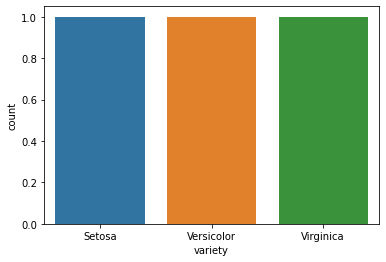

In [252]:
sns.countplot(x='variety', data=df, )
plt.show()

[]

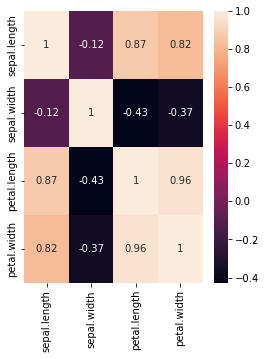

In [253]:
plt.figure(figsize=(4,5))
sns.heatmap(data.corr(),annot=True)
plt.plot()

In [254]:
data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [255]:
data["variety"].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [256]:
data.nunique()

sepal.length    35
sepal.width     23
petal.length    43
petal.width     22
variety          3
dtype: int64

In [257]:
data.corr(method='pearson')

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


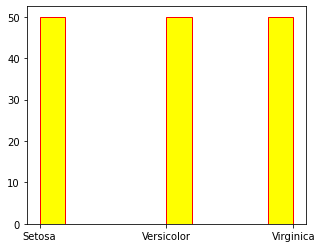

In [258]:
plt.figure(figsize=(5,4))
plt.hist(data["variety"],color ='yellow',edgecolor='r')

plt.show()

<AxesSubplot:ylabel='variety'>

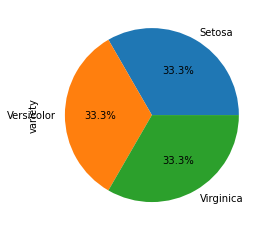

In [259]:
data["variety"].value_counts().plot(kind="pie",autopct='%.1f%%')

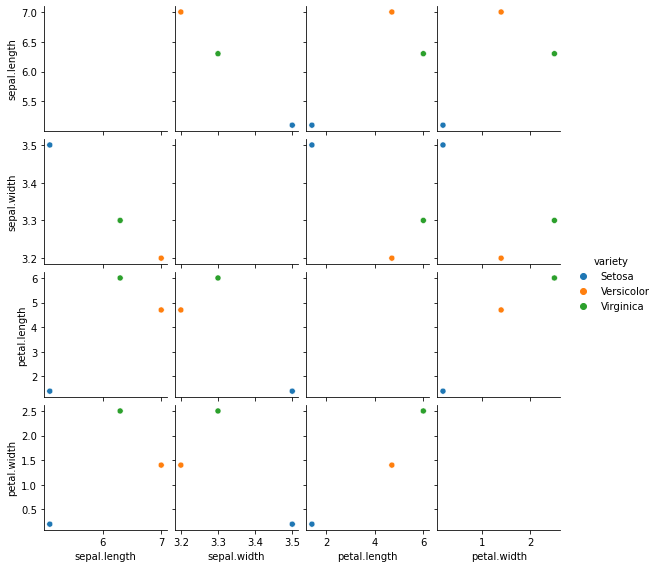

In [260]:
sns.pairplot(df,hue='variety', height=2)

In [261]:
### The pandas plot extenstion can be used to make a scatterplot
# Display your plot with plt.show

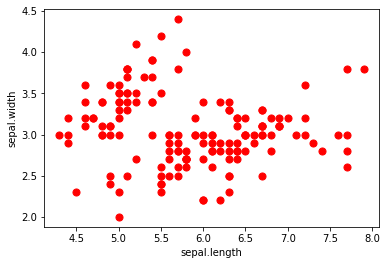

In [262]:
data.plot(kind="scatter", x="sepal.length", y="sepal.width",color="r",s=50 )
plt.show()

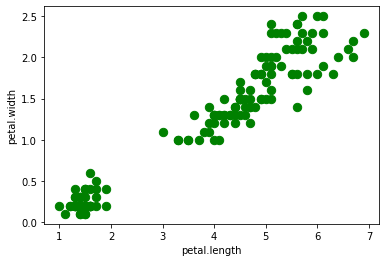

In [263]:
data.plot(kind="scatter", x="petal.length", y="petal.width",color="green",s=70 )
plt.show()

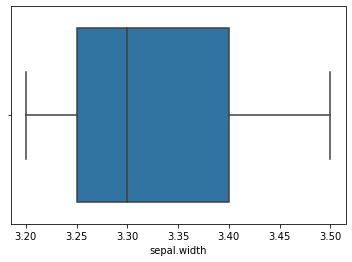

In [264]:
sns.boxplot(x='sepal.width', data=df)
plt.show()

# Building a Decision Tree

In [265]:
df = data.dropna(axis=0)

In [266]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [267]:
y = df['variety']

In [268]:
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [269]:
data =data.drop('variety', 1)

In [270]:
data

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [271]:
from sklearn.model_selection import train_test_split

In [272]:
x_train, x_test, y_train, y_test = train_test_split(data ,y , test_size=0.1 , random_state =42)

In [273]:
print(x_train.shape, y_train.shape )

(135, 4) (135,)


In [274]:
DT = tree.DecisionTreeClassifier()
DT = DT.fit(x_train , y_train)

In [275]:
DT.predict(x_test)
prediction = DT.predict(x_test)

In [276]:
prediction

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa'], dtype=object)

In [277]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [278]:
print(classification_report(y_test, prediction))



              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         6
  Versicolor       1.00      1.00      1.00         6
   Virginica       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [279]:
from sklearn.tree import plot_tree


In [280]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

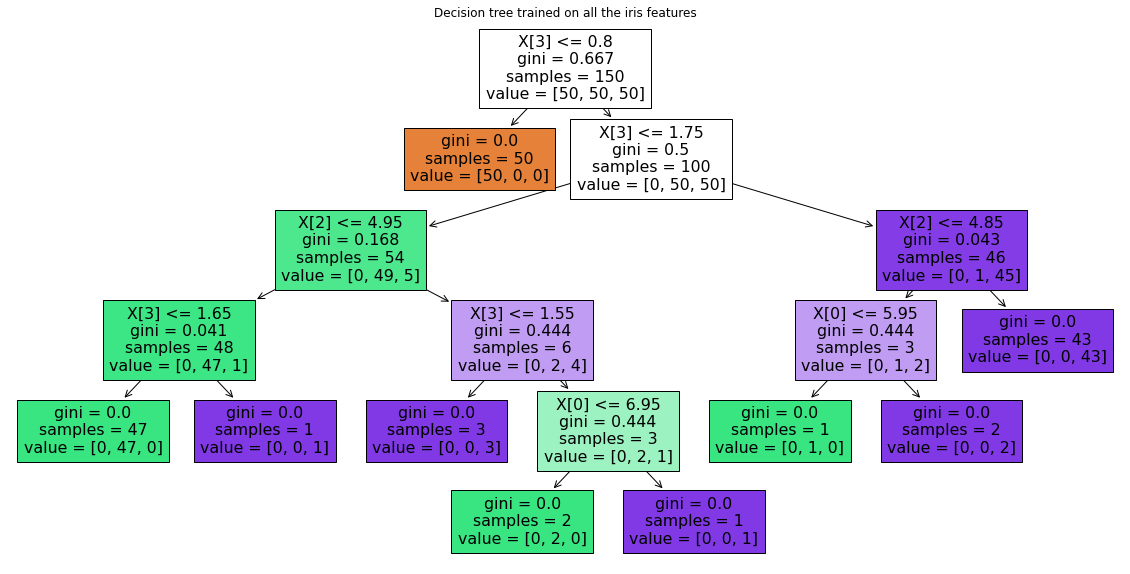

In [281]:
clf = DecisionTreeClassifier().fit(data, y)

plt.subplots(figsize=(20, 10))
plot_tree(clf, filled=True)

plt.title("Decision tree trained on all the iris features")
plt.show()